In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import squarify
import pandas as pd
import seaborn as sns
import datetime
import ipywidgets as widgets

In [2]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium
from folium.plugins import HeatMap


## About the company ##
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.  

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends. 



# ASK


### Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

### Scenario
Cyclistic's marketing strategy has been to build general awareness and appeal to broad consumer segments, using pricing flexibility to attract both casual riders and annual members. However, the finance analysts have concluded that annual members are much more profitable than casual riders. As a result, Moreno, the company's marketing director, has set a goal of designing marketing strategies aimed at converting casual riders into annual members. To achieve this goal, the marketing analyst team needs to better understand the differences between annual members and casual riders, why casual riders would buy a membership, and how digital media could affect their marketing tactics. They plan to analyze the Cyclistic historical bike trip data to identify trends.
### Stakeholders
 - Marketing Teams
 - Cyclistic excutive team
 
### Deliverable
 - A deeper understanding of how Cyclistic's annual members and casual riders use the bikes differently
 - Clear and compelling visuals and data to support your insights
 - Three actionable recommendations to convert more casual riders into profitable annual members

# Prepare

### Data Sources
A total of 12 datasets have been made available for each month starting from Jan 2022 to Dec 2022. Each dataset captures the details of every ride logged by the customers of Cyclistic. This data that has been made publicly available has been scrubbed to omit rider's personal information.
### Documentation, Cleaning and Preparation of data for analysis
The combined size of all the 16 datasets is close to 200 MB. Data cleaning in spreadsheets will be time-consuming and slow compared to SQL or R or Python. I am choosing Python simply because I could do both data wrangling and analysis/ visualizations in the same platform. It is also an opportunity for me to learn Python better.

In [4]:
trip1 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202201-divvy-tripdata.csv")


In [5]:

trip1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103770 entries, 0 to 103769
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             103770 non-null  object 
 1   rideable_type       103770 non-null  object 
 2   started_at          103770 non-null  object 
 3   ended_at            103770 non-null  object 
 4   start_station_name  87510 non-null   object 
 5   start_station_id    87510 non-null   object 
 6   end_station_name    85843 non-null   object 
 7   end_station_id      85843 non-null   object 
 8   start_lat           103770 non-null  float64
 9   start_lng           103770 non-null  float64
 10  end_lat             103684 non-null  float64
 11  end_lng             103684 non-null  float64
 12  member_casual       103770 non-null  object 
dtypes: float64(4), object(9)
memory usage: 10.3+ MB


In [6]:
trip2 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202202-divvy-tripdata.csv")
trip2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             115609 non-null  object 
 1   rideable_type       115609 non-null  object 
 2   started_at          115609 non-null  object 
 3   ended_at            115609 non-null  object 
 4   start_station_name  97029 non-null   object 
 5   start_station_id    97029 non-null   object 
 6   end_station_name    95254 non-null   object 
 7   end_station_id      95254 non-null   object 
 8   start_lat           115609 non-null  float64
 9   start_lng           115609 non-null  float64
 10  end_lat             115532 non-null  float64
 11  end_lng             115532 non-null  float64
 12  member_casual       115609 non-null  object 
dtypes: float64(4), object(9)
memory usage: 11.5+ MB


In [7]:
trip3 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202203-divvy-tripdata.csv")
trip3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284042 entries, 0 to 284041
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             284042 non-null  object 
 1   rideable_type       284042 non-null  object 
 2   started_at          284042 non-null  object 
 3   ended_at            284042 non-null  object 
 4   start_station_name  236796 non-null  object 
 5   start_station_id    236796 non-null  object 
 6   end_station_name    232885 non-null  object 
 7   end_station_id      232885 non-null  object 
 8   start_lat           284042 non-null  float64
 9   start_lng           284042 non-null  float64
 10  end_lat             283776 non-null  float64
 11  end_lng             283776 non-null  float64
 12  member_casual       284042 non-null  object 
dtypes: float64(4), object(9)
memory usage: 28.2+ MB


In [8]:
trip4 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202204-divvy-tripdata.csv")
trip4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371249 entries, 0 to 371248
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             371249 non-null  object 
 1   rideable_type       371249 non-null  object 
 2   started_at          371249 non-null  object 
 3   ended_at            371249 non-null  object 
 4   start_station_name  300362 non-null  object 
 5   start_station_id    300362 non-null  object 
 6   end_station_name    295961 non-null  object 
 7   end_station_id      295961 non-null  object 
 8   start_lat           371249 non-null  float64
 9   start_lng           371249 non-null  float64
 10  end_lat             370932 non-null  float64
 11  end_lng             370932 non-null  float64
 12  member_casual       371249 non-null  object 
dtypes: float64(4), object(9)
memory usage: 36.8+ MB


In [9]:
trip5 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202205-divvy-tripdata.csv")
trip5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634858 entries, 0 to 634857
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             634858 non-null  object 
 1   rideable_type       634858 non-null  object 
 2   started_at          634858 non-null  object 
 3   ended_at            634858 non-null  object 
 4   start_station_name  548154 non-null  object 
 5   start_station_id    548154 non-null  object 
 6   end_station_name    541687 non-null  object 
 7   end_station_id      541687 non-null  object 
 8   start_lat           634858 non-null  float64
 9   start_lng           634858 non-null  float64
 10  end_lat             634136 non-null  float64
 11  end_lng             634136 non-null  float64
 12  member_casual       634858 non-null  object 
dtypes: float64(4), object(9)
memory usage: 63.0+ MB


In [10]:
trip6 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202206-divvy-tripdata.csv")
trip6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769204 entries, 0 to 769203
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             769204 non-null  object 
 1   rideable_type       769204 non-null  object 
 2   started_at          769204 non-null  object 
 3   ended_at            769204 non-null  object 
 4   start_station_name  676260 non-null  object 
 5   start_station_id    676260 non-null  object 
 6   end_station_name    669052 non-null  object 
 7   end_station_id      669052 non-null  object 
 8   start_lat           769204 non-null  float64
 9   start_lng           769204 non-null  float64
 10  end_lat             768149 non-null  float64
 11  end_lng             768149 non-null  float64
 12  member_casual       769204 non-null  object 
dtypes: float64(4), object(9)
memory usage: 76.3+ MB


In [11]:
trip7 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202207-divvy-tripdata.csv")
trip7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823488 entries, 0 to 823487
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             823488 non-null  object 
 1   rideable_type       823488 non-null  object 
 2   started_at          823488 non-null  object 
 3   ended_at            823488 non-null  object 
 4   start_station_name  711457 non-null  object 
 5   start_station_id    711457 non-null  object 
 6   end_station_name    702537 non-null  object 
 7   end_station_id      702537 non-null  object 
 8   start_lat           823488 non-null  float64
 9   start_lng           823488 non-null  float64
 10  end_lat             822541 non-null  float64
 11  end_lng             822541 non-null  float64
 12  member_casual       823488 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.7+ MB


In [12]:
trip8 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202208-divvy-tripdata.csv")
trip8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785932 entries, 0 to 785931
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             785932 non-null  object 
 1   rideable_type       785932 non-null  object 
 2   started_at          785932 non-null  object 
 3   ended_at            785932 non-null  object 
 4   start_station_name  673895 non-null  object 
 5   start_station_id    673895 non-null  object 
 6   end_station_name    665410 non-null  object 
 7   end_station_id      665410 non-null  object 
 8   start_lat           785932 non-null  float64
 9   start_lng           785932 non-null  float64
 10  end_lat             785089 non-null  float64
 11  end_lng             785089 non-null  float64
 12  member_casual       785932 non-null  object 
dtypes: float64(4), object(9)
memory usage: 78.0+ MB


In [13]:
trip9 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202209-divvy-publictripdata.csv")
trip9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701339 entries, 0 to 701338
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             701339 non-null  object 
 1   rideable_type       701339 non-null  object 
 2   started_at          701339 non-null  object 
 3   ended_at            701339 non-null  object 
 4   start_station_name  597559 non-null  object 
 5   start_station_id    597559 non-null  object 
 6   end_station_name    590154 non-null  object 
 7   end_station_id      590154 non-null  object 
 8   start_lat           701339 non-null  float64
 9   start_lng           701339 non-null  float64
 10  end_lat             700627 non-null  float64
 11  end_lng             700627 non-null  float64
 12  member_casual       701339 non-null  object 
dtypes: float64(4), object(9)
memory usage: 69.6+ MB


In [14]:
trip10 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202210-divvy-tripdata.csv")
trip10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558685 entries, 0 to 558684
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             558685 non-null  object 
 1   rideable_type       558685 non-null  object 
 2   started_at          558685 non-null  object 
 3   ended_at            558685 non-null  object 
 4   start_station_name  467330 non-null  object 
 5   start_station_id    467330 non-null  object 
 6   end_station_name    462068 non-null  object 
 7   end_station_id      462068 non-null  object 
 8   start_lat           558685 non-null  float64
 9   start_lng           558685 non-null  float64
 10  end_lat             558210 non-null  float64
 11  end_lng             558210 non-null  float64
 12  member_casual       558685 non-null  object 
dtypes: float64(4), object(9)
memory usage: 55.4+ MB


In [15]:
trip11 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202211-divvy-tripdata.csv")
trip11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337735 entries, 0 to 337734
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             337735 non-null  object 
 1   rideable_type       337735 non-null  object 
 2   started_at          337735 non-null  object 
 3   ended_at            337735 non-null  object 
 4   start_station_name  285778 non-null  object 
 5   start_station_id    285778 non-null  object 
 6   end_station_name    283476 non-null  object 
 7   end_station_id      283476 non-null  object 
 8   start_lat           337735 non-null  float64
 9   start_lng           337735 non-null  float64
 10  end_lat             337505 non-null  float64
 11  end_lng             337505 non-null  float64
 12  member_casual       337735 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.5+ MB


In [16]:
trip12 = pd.read_csv("C:\\Users\\HP\\Downloads\\2022-divvy-tripdata\\202212-divvy-tripdata.csv")
trip12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181806 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             181806 non-null  object 
 1   rideable_type       181806 non-null  object 
 2   started_at          181806 non-null  object 
 3   ended_at            181806 non-null  object 
 4   start_station_name  152523 non-null  object 
 5   start_station_id    152523 non-null  object 
 6   end_station_name    150648 non-null  object 
 7   end_station_id      150648 non-null  object 
 8   start_lat           181806 non-null  float64
 9   start_lng           181806 non-null  float64
 10  end_lat             181678 non-null  float64
 11  end_lng             181678 non-null  float64
 12  member_casual       181806 non-null  object 
dtypes: float64(4), object(9)
memory usage: 18.0+ MB


### Data transformation and cleaning

All dataframe have same datatype so we dont need to convert data

# Process
Concat all the dataset into 1 dataframe

In [17]:
df_trip2022 = pd.concat([trip1,trip2,trip3,trip4,trip5,trip6,trip7,trip8,trip9,trip10,trip11,trip12], axis=0)

In [18]:
df_trip2022.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [19]:
df_trip2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


Delect row that Duration < 0

In [20]:
durationless0 = df_trip2022.loc[df_trip2022['ended_at'] < df_trip2022['started_at']].index
len(durationless0)

100

In [21]:
trip2022 = df_trip2022.drop(durationless0, axis = 0)

### started_at & ended_at should be in datetime datatype instead of char. Convert all from char to datetime.
* started_at
* ended_at
* ride_length

In [22]:
trip2022 = trip2022.copy()
trip2022.loc[:, 'started_at'] = pd.to_datetime(trip2022['started_at'])
trip2022.loc[:, 'ended_at'] = pd.to_datetime(trip2022['ended_at'])

In [23]:
trip2022['ride_length'] = pd.to_timedelta(trip2022['ended_at'] - trip2022['started_at'])

In [24]:
trip2022['day_of_week'] = trip2022['started_at'].dt.dayofweek

In [25]:
trip2022.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    832922
start_station_id      832922
end_station_name      892630
end_station_id        892630
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
ride_length                0
day_of_week                0
dtype: int64

In [26]:
trip2022 = trip2022.dropna(axis = 0)
trip2022.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_length           0
day_of_week           0
dtype: int64

In [27]:
trip2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,3
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,0
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,1
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,1
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,3


In [28]:
trip2022.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,4.368746e+06,4.368746e+06,4.368746e+06,4.368746e+06,4368746,4.368746e+06
mean,4.190202e+01,-8.764484e+01,4.190226e+01,-8.764495e+01,0 days 00:17:05.752478628,3.052121e+00
std,4.256198e-02,2.577976e-02,7.098791e-02,1.212318e-01,0 days 00:47:52.183864287,1.980087e+00
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,0 days 00:00:00,0.000000e+00
25%,4.188104e+01,-8.765814e+01,4.188132e+01,-8.765862e+01,0 days 00:06:03,1.000000e+00
50%,4.189694e+01,-8.764182e+01,4.189766e+01,-8.764275e+01,0 days 00:10:36,3.000000e+00
75%,4.192877e+01,-8.762858e+01,4.192889e+01,-8.762858e+01,0 days 00:19:01,5.000000e+00
max,4.563503e+01,-7.379648e+01,4.206485e+01,0.000000e+00,23 days 20:34:04,6.000000e+00


In [29]:
trip2022['day_of_week'].value_counts()

5    705519
3    645815
2    616292
4    608762
1    607551
6    598953
0    585854
Name: day_of_week, dtype: int64

In [30]:
trip2022['ride_length'] = trip2022['ride_length'].dt.total_seconds().astype(float)
trip2022.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length,day_of_week
count,4.368746e+06,4.368746e+06,4.368746e+06,4.368746e+06,4.368746e+06,4.368746e+06
mean,4.190202e+01,-8.764484e+01,4.190226e+01,-8.764495e+01,1.025752e+03,3.052121e+00
std,4.256198e-02,2.577976e-02,7.098791e-02,1.212318e-01,2.872184e+03,1.980087e+00
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,0.000000e+00,0.000000e+00
25%,4.188104e+01,-8.765814e+01,4.188132e+01,-8.765862e+01,3.630000e+02,1.000000e+00
50%,4.189694e+01,-8.764182e+01,4.189766e+01,-8.764275e+01,6.360000e+02,3.000000e+00
75%,4.192877e+01,-8.762858e+01,4.192889e+01,-8.762858e+01,1.141000e+03,5.000000e+00
max,4.563503e+01,-7.379648e+01,4.206485e+01,0.000000e+00,2.061244e+06,6.000000e+00


In [31]:
trip2022['member_casual'].value_counts()

member    2610800
casual    1757946
Name: member_casual, dtype: int64

# Analyze & Share

In [32]:
# statictical summary of ride_length for all trips

In [33]:
# Mean
mean_rl = trip2022['ride_length'].mean()

# Median
median_rl = trip2022['ride_length'].median()

# Mode
mode_rl = trip2022['ride_length'].mode().get(0)

# Sum
sum_rl = trip2022['ride_length'].sum()

# Std
std_rl = trip2022['ride_length'].std()

print('Mean    : ', mean_rl,'s')
print('Median  : ', median_rl,'s')
print('Mode    : ', mode_rl,'s')
print('Sum     : ', sum_rl,'s')
print('Std     : ', std_rl,'s')

Mean    :  1025.7524786288789 s
Median  :  636.0 s
Mode    :  359.0 s
Sum     :  4481252038.0 s
Std     :  2872.1838642886632 s


In [34]:
sta_custype = trip2022.groupby('member_casual').agg(
    cus_min=('ride_length', 'min'),
    cus_max=('ride_length', 'max'),
    cus_median=('ride_length', 'median'),
    cus_mean=('ride_length', 'mean')
)
print(sta_custype)

               cus_min    cus_max  cus_median     cus_mean
member_casual                                             
casual             0.0  2061244.0       831.0  1439.583690
member             0.0    89594.0       539.0   747.104967


In [35]:
cus_weekday = trip2022.groupby(['member_casual', 'day_of_week']).agg(
    number_of_rides=('ride_length', 'count'),
    average_ride_length=('ride_length', 'mean')
).reset_index().sort_values(by=['member_casual', 'day_of_week'], ascending=[True, False])
print(cus_weekday)

   member_casual  day_of_week  number_of_rides  average_ride_length
6         casual            6           301266          1633.666444
5         casual            5           367301          1605.986703
4         casual            4           248758          1341.435274
3         casual            3           229981          1284.186876
2         casual            2           203553          1243.068980
1         casual            1           196360          1286.493512
0         casual            0           210727          1490.004072
13        member            6           297687           831.042316
12        member            5           338218           838.901457
11        member            4           360004           733.629812
10        member            3           415834           721.909846
9         member            2           412739           710.819293
8         member            1           411191           707.467593
7         member            0           375127  

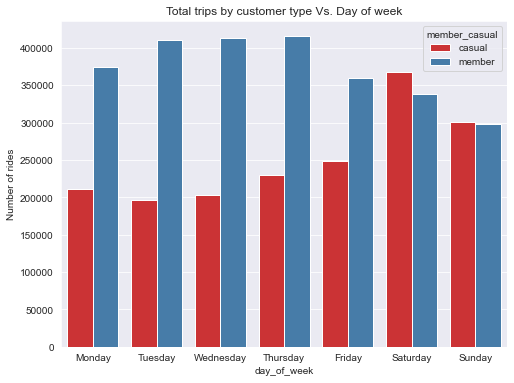

In [36]:
plot_data = trip2022.groupby(['member_casual', 'day_of_week']).agg(
    number_of_rides=('ride_length', 'count')
).reset_index().sort_values(by=['member_casual', 'day_of_week'])

sns.set_style('darkgrid')
sns.set_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='day_of_week', y='number_of_rides', hue='member_casual', data=plot_data, ax=ax)

ax.set_title('Total trips by customer type Vs. Day of week')
ax.set_ylabel('Number of rides')
plt.xticks(range(0,7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

It can be observed that on weekdays, the number of bike rides by members is higher than that of casual riders. On weekends, the number of member bike rides is almost equal to that of casual riders. It can be seen that members ride bikes regularly throughout the week, while casual riders only ride on weekends.

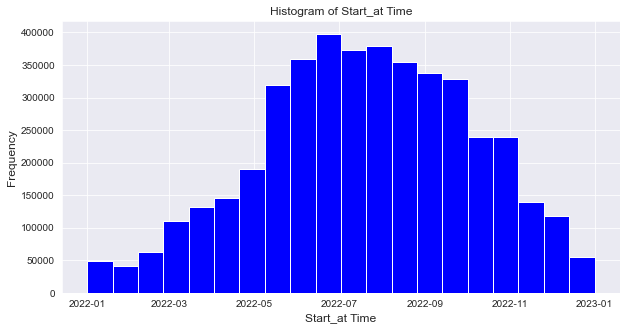

In [37]:
# Histogram distribution
# started_at
trip2022["started_at"].hist(figsize=(10,5), bins=20, color = "blue")
plt.title("Histogram of Start_at Time")
plt.xlabel("Start_at Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid lines
plt.grid(True)

# Increase font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

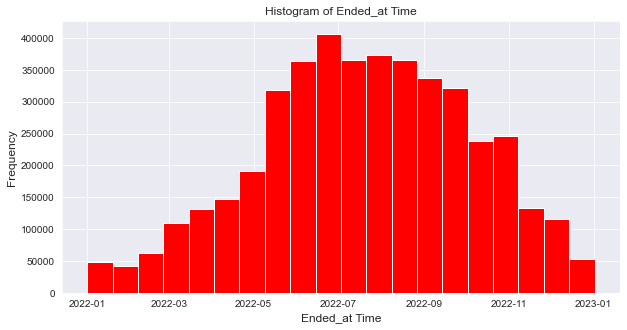

In [38]:
trip2022["ended_at"].hist(figsize=(10,5), bins=20, color="r")
plt.title("Histogram of Ended_at Time")
plt.xlabel("Ended_at Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Add grid lines
plt.grid(True)

# Increase font size of tick labels
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Analyze start and end location

In [39]:
start_station = trip2022[['start_station_name']].value_counts().reset_index()
start_station = start_station.rename(columns = {0:'count'})
top_5_ss = start_station[start_station['count'] > 33000]
top_5_ss

,start_station_name,count
0,Streeter Dr & Grand Ave,71262
1,DuSable Lake Shore Dr & Monroe St,39244
2,DuSable Lake Shore Dr & North Blvd,37691
3,Michigan Ave & Oak St,37203
4,Wells St & Concord Ln,34504


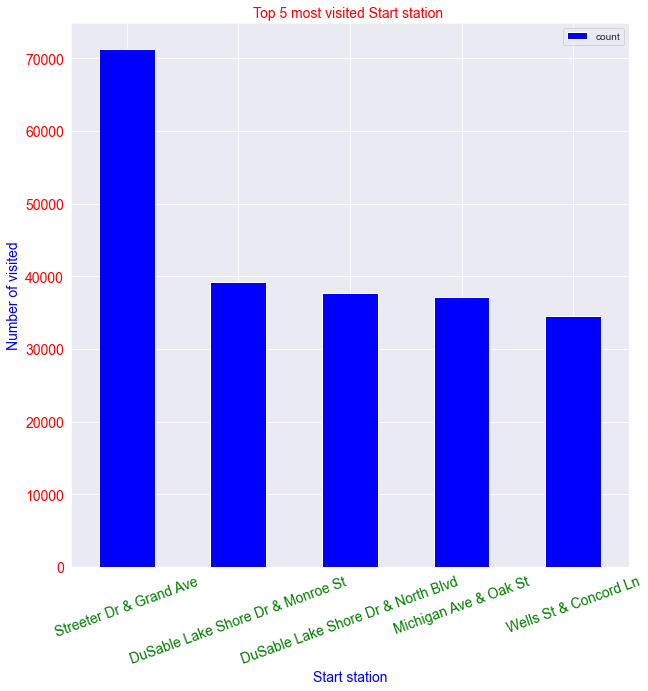

In [40]:
top_5_ss.plot.bar(rot = 0, figsize=(10,10), color = "b")
plt.xticks(fontsize = 14, color = 'g')
plt.yticks(fontsize = 14, color = 'r')
plt.title('Top 5 most visited Start station ',fontsize = 14, color = 'r')
plt.ylabel('Number of visited', fontsize = 14, color = 'b')
plt.xlabel('Start station', fontsize = 14, color = 'b')
plt.xticks(range(0,5), top_5_ss['start_station_name'])
plt.xticks(rotation=20)
plt.show()

In [41]:
end_station = trip2022[['end_station_name']].value_counts().reset_index()
end_station = end_station.rename(columns = {0:'count'})
top_5_es = end_station[end_station['count'] > 34000]
top_5_es

,end_station_name,count
0,Streeter Dr & Grand Ave,72532
1,DuSable Lake Shore Dr & North Blvd,40543
2,DuSable Lake Shore Dr & Monroe St,38491
3,Michigan Ave & Oak St,38273
4,Wells St & Concord Ln,34686


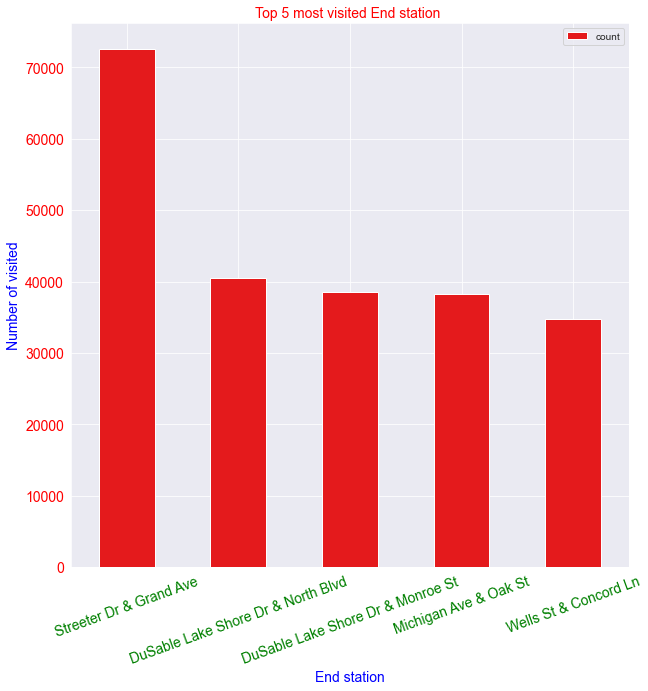

In [42]:
top_5_es.plot.bar(rot = 0, figsize=(10,10))
plt.xticks(fontsize = 14, color = 'g')
plt.yticks(fontsize = 14, color = 'r')
plt.title('Top 5 most visited End station ',fontsize = 14, color = 'r')
plt.ylabel('Number of visited', fontsize = 14, color = 'b')
plt.xlabel('End station', fontsize = 14, color = 'b')
plt.xticks(range(0,5), top_5_es['end_station_name'])
plt.xticks(rotation=20)
plt.show()

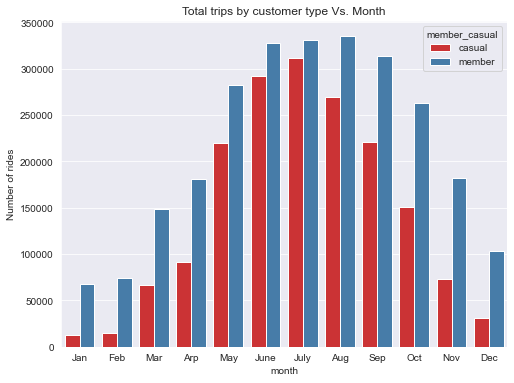

In [45]:
plot_data1 = trip2022.groupby(['member_casual', 'month']).agg(
    number_of_rides=('ride_length', 'count')
).reset_index().sort_values(by=['member_casual', 'month'])

sns.set_style('darkgrid')
sns.set_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='month', y='number_of_rides', hue='member_casual', data=plot_data1, ax=ax)

ax.set_title('Total trips by customer type Vs. Month')
ax.set_ylabel('Number of rides')
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Arp', 'May', 'June', 'July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

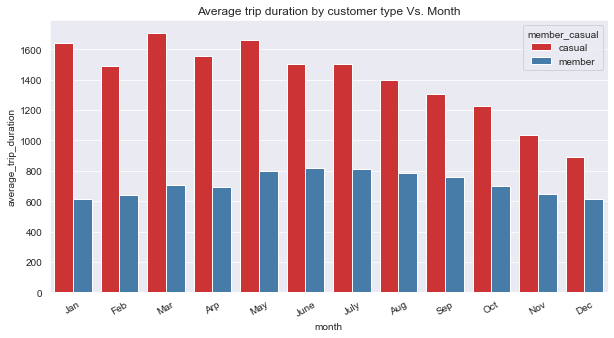

In [46]:
avg_duration_by_type_month = trip2022.groupby(['member_casual', 'month']).agg(average_trip_duration=('ride_length', 'mean')).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='average_trip_duration', hue='member_casual', data=avg_duration_by_type_month, dodge=True)
plt.title("Average trip duration by customer type Vs. Month")
plt.xticks(rotation=30)
plt.xticks(range(0,12), ['Jan', 'Feb', 'Mar', 'Arp', 'May', 'June', 'July','Aug','Sep','Oct','Nov','Dec'])
plt.show()

# Act

### Key takeaways

The average trip duration for casual riders was almost twice as long as that of member riders, based on trip duration.

Casual riders tended to use bikeshare services more often on weekends, while member riders used them more consistently throughout the week. Additionally, the average trip duration for casual riders was more than twice as long as that of member riders on any given day of the week.

In the first half of the year, casual riders tended to ride longer than in the second half, while members had relatively consistent average trip durations from month to month.

Finally, casual riders preferred docked bikes the most, while classic bikes were popular among members.

### Recommendations

Based on these findings, we recommend offering attractive promotions for casual riders on weekdays to encourage more even usage of bikeshare services throughout the week. Additionally, offering discounted membership fees for renewals after the first year could encourage more casual riders to take up membership. Finally, offering discounted pricing during non-busy hours could encourage casual riders to use bikes more frequently and level out demand over the course of the day.

In [44]:
trip2022['month'] = pd.DatetimeIndex(trip2022['started_at']).month

In [47]:
trip2022['month'].value_counts()

7     642603
6     620275
8     605250
9     535072
5     502472
10    414215
4     272513
11    255746
3     215942
12    135379
2      89164
1      80115
Name: month, dtype: int64